In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import(accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay)
import matplotlib.pyplot as plt
import seaborn

file = "../Titanic.csv"
dataframe = pandas.read_csv(file)

# PART 2 : previous task!
# Task 1
dataframe_clean = dataframe.dropna() # 1.1 deleting empty rows

columns_to_delete = ['Name', 'Ticket', 'Cabin'] # 1.2
dataframe_clean = dataframe_clean.drop(columns = columns_to_delete)
dataframe_clean = dataframe_clean.drop(columns = 'PassengerId') # 1.4

dataframe_clean['Sex'] = dataframe_clean['Sex'].map({'male': 0, 'female': 1}) # 1.3
dataframe_clean['Embarked'] = dataframe_clean['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

rows = len(dataframe)
rows_clean = len(dataframe_clean)
data_loss = ((rows - rows_clean) / rows) * 100 # 1.5 data loss after completing 1.1 and 1.2 + 1.4
print(data_loss, '% of data is lost after completing 1.1, 1.2, 1.4')

79.46127946127946 % of data is lost after completing 1.1, 1.2, 1.4


In [20]:
X = dataframe_clean.drop('Survived', axis = 1)
Y = dataframe_clean['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42) # 2.1

clf = LogisticRegression(max_iter=1000) # 2.2
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predict)
print("Accuracy score: ", accuracy)

# PART 3.1
def metrics(Y_test, Y_predict):
    precision = precision_score(Y_test, Y_predict)
    recall = recall_score(Y_test, Y_predict)
    f1 = f1_score(Y_test, Y_predict)
    print(f'Precision score: {precision}, Recall score: {recall}, F1 score: {f1}.')

print('Logistic Regression:')
metrics(Y_test, Y_predict)

Accuracy score:  0.6909090909090909
Logistic Regression:
Precision score: 0.78125, Recall score: 0.7142857142857143, F1 score: 0.746268656716418.


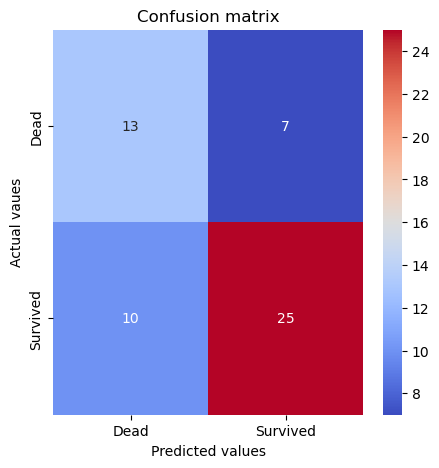

In [9]:
# confusion matrix
matrix = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize = (5, 5))
seaborn.heatmap(matrix, annot = True, fmt = 'd',
                cmap = 'coolwarm',
                xticklabels = ['Dead', 'Survived'],
                yticklabels = ['Dead', 'Survived'])
plt.title('Confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual vaues')
plt.show()

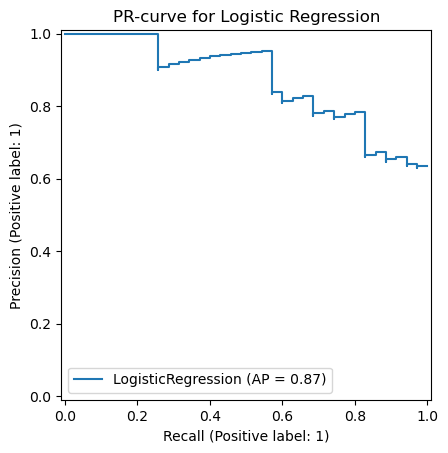

In [ ]:
# PR-curve
PrecisionRecallDisplay.from_estimator(clf, X_test, Y_test)
plt.title('PR-curve for Logistic Regression')
plt.show()

# CONCLUSION: AUC-PR = 0.87 (close to 1) => model is good enough.

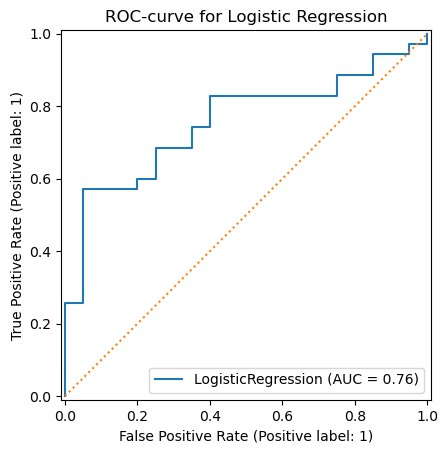

In [ ]:
# ROC-curve
RocCurveDisplay.from_estimator(clf, X_test, Y_test)
plt.plot([0, 1], [0, 1], linestyle = ':')
plt.title('ROC-curve for Logistic Regression')
plt.show()

# CONCLUSION: AUC-ROC = 0.76 (close to 1) => the model is good enough.

In [18]:
# PART 3.2
'''
SVM - Support Vector Machines
KNN - K-Nearest Neighbors
'''
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# SVM metrics
model_SVM = SVC(probability = True, random_state = 42)
model_SVM.fit(X_train, Y_train)

Y_SVM = model_SVM.predict(X_test) # Y predict for SVM
print('SVM:')
metrics(Y_test, Y_SVM)

SVM:
Precision score: 0.6363636363636364, Recall score: 1.0, F1 score: 0.7777777777777778.


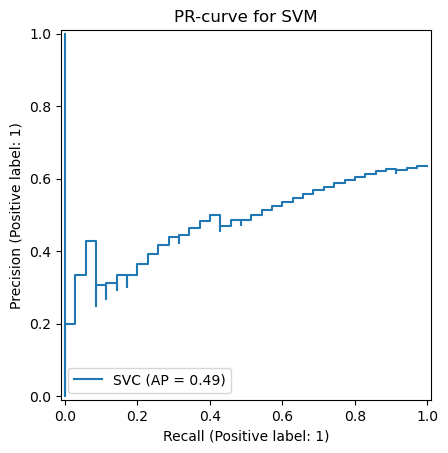

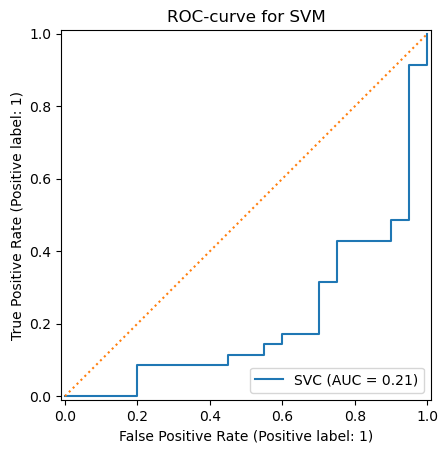

In [ ]:
# SVM PR-curve
PrecisionRecallDisplay.from_estimator(model_SVM, X_test, Y_test)
plt.title('PR-curve for SVM')
plt.show()

# CONCLUSION: AUC-PR = 0.49 (close to 0.5) => model is not exactly precise.

# SVM ROC-curve
RocCurveDisplay.from_estimator(model_SVM, X_test, Y_test)
plt.plot([0, 1], [0, 1], linestyle = ':')
plt.title('ROC-curve for SVM')
plt.show()

# CONCLUSION: AUc-ROC = 0.21 (close to 0) => model is not precise.

In [22]:
# KNN metrics
model_KNN = KNeighborsClassifier(n_neighbors = 5)
model_KNN.fit(X_train, Y_train)

Y_KNN = model_KNN.predict(X_test) # Y predict for SVM
print('KNN:')
metrics(Y_test, Y_KNN)

KNN:
Precision score: 0.6739130434782609, Recall score: 0.8857142857142857, F1 score: 0.7654320987654321.


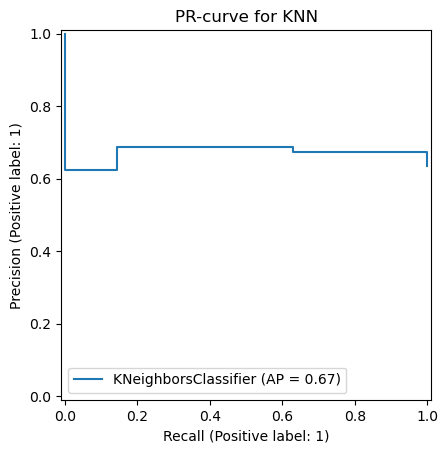

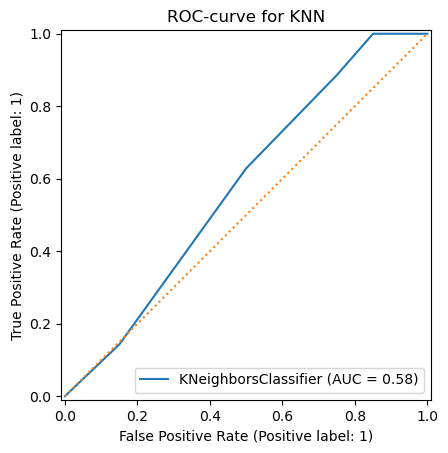

In [ ]:
# KNN PR-curve
PrecisionRecallDisplay.from_estimator(model_KNN, X_test, Y_test)
plt.title('PR-curve for KNN')
plt.show()

# CONCLUSION: AUC-PR = 0.67 (close to 0.5) => model is not exactly precise (but better than SVM).

# SVM ROC-curve
RocCurveDisplay.from_estimator(model_KNN, X_test, Y_test)
plt.plot([0, 1], [0, 1], linestyle = ':')
plt.title('ROC-curve for KNN')
plt.show()
# CONCLUSION: AUC-ROC = 0.58 (close to 0.5) => model is not exactly precise (but better than SVM).

CONCLUSION: Logistic Regression has the best results (in comparison with SVM and KNN).